### Importing necessary libraries and reading the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
train=pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Preprocessing

In [4]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
train['Age'].fillna(value=train['Age'].mean(),inplace=True)

In [6]:
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [7]:
train['Embarked']=train['Embarked'].fillna(value='S')

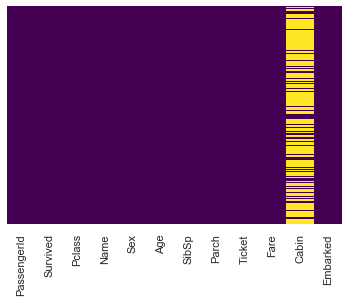

In [8]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
train.drop(columns=['Cabin', 'Name','Ticket'],axis=1,inplace=True)

In [10]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

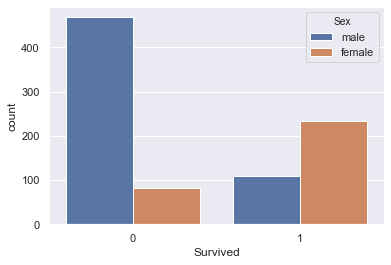

In [11]:
sns.countplot(x='Survived', hue='Sex', data=train)

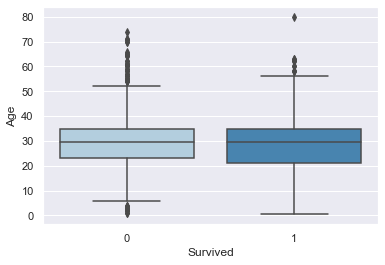

In [12]:
sns.boxplot(x='Survived',y='Age',data=train,palette="Blues")

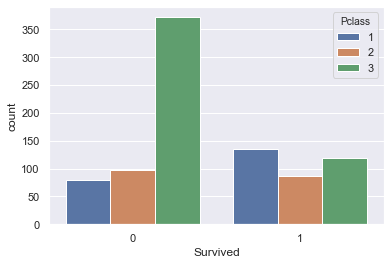

In [13]:
sns.countplot(x='Survived', hue='Pclass', data=train)

In [14]:
X = train.iloc[:,2:]
y = train.iloc[:,1]

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X['Sex']=le.fit_transform(X['Sex'])

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X['Embarked']=le.fit_transform(X['Embarked'])

### Creating the model with KNN algorithm

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [20]:
y_pred=knn.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

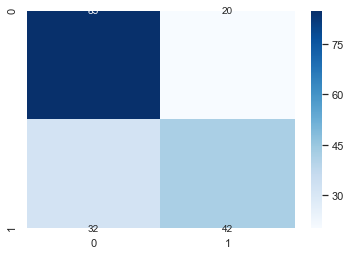

In [22]:
sns.heatmap(cm,annot=True,cmap='Blues')

In [23]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
score

0.7094972067039106

### Model with SVM

In [24]:
from sklearn.svm import SVC
svm =  SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [25]:
y_pred=svm.predict(X_test)

In [26]:
from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(y_test, y_pred)
print(cm_svm)
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
print(score)

[[88 17]
 [22 52]]
0.7821229050279329


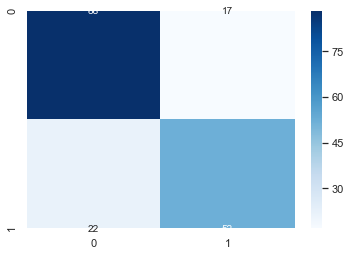

In [27]:
sns.heatmap(cm_svm,annot=True,cmap='Blues')

In [28]:
from sklearn.svm import SVC
svm =  SVC(kernel='rbf')
svm.fit(X_train, y_train)

C:\Users\Arif\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [29]:
y_pred=svm.predict(X_test)

In [30]:
from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(y_test, y_pred)
print(cm_svm)
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
print(score)

[[91 14]
 [42 32]]
0.6871508379888268


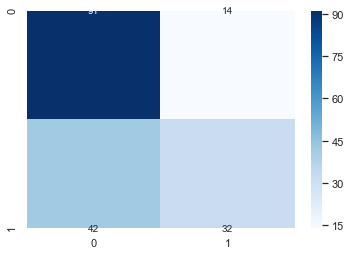

In [31]:
sns.heatmap(cm_svm,annot=True,cmap='Blues')

### Model with Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

C:\Users\Arif\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
y_pred = classifier.predict(X_test)

In [34]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [35]:
cm

array([[89, 16],
       [22, 52]], dtype=int64)

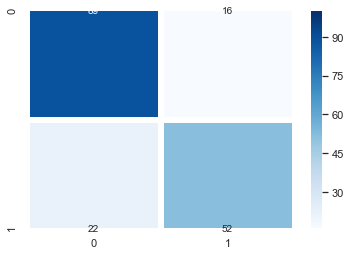

In [40]:
sns.heatmap(cm, annot=True,cmap="Blues",linewidth=5,vmax=100)

In [37]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
score

0.7877094972067039

### Decision Tree algorithm

In [42]:
from sklearn import tree
dtc=tree.DecisionTreeClassifier(criterion='entropy')
dtc.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [44]:
y_pred=dtc.predict(X_test)
y_pred

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [49]:
score = accuracy_score(y_test,y_pred)
matrix = confusion_matrix(y_test,y_pred)

In [50]:
matrix

array([[89, 16],
       [19, 55]], dtype=int64)

In [51]:
score

0.8044692737430168

### Random Forest Classifier

In [144]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=None)
rf.fit(X_train,y_train)

C:\Users\Arif\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [145]:
y_pred = rf.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [146]:
score2=accuracy_score(y_test,y_pred)
matrix2=confusion_matrix(y_test,y_pred)

In [147]:
matrix

array([[89, 16],
       [19, 55]], dtype=int64)

In [148]:
score2

0.8268156424581006

### Test data

In [171]:
test=pd.read_csv('test.csv')

In [172]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [173]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [174]:
test['Age'].fillna(value=test.Age.mean(),inplace=True)

In [175]:
test.drop(columns=['Name','Ticket','Cabin'],inplace=True)

In [176]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
dtype: int64

In [177]:
test['Fare'].fillna(value=test.Fare.mean(),inplace=True)

In [178]:
test.shape

(418, 8)

In [179]:
train.shape

(891, 9)

In [180]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.50000,0,0,7.8292,Q
1,893,3,female,47.00000,1,0,7.0000,S
2,894,2,male,62.00000,0,0,9.6875,Q
3,895,3,male,27.00000,0,0,8.6625,S
4,896,3,female,22.00000,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,1305,3,male,30.27259,0,0,8.0500,S
414,1306,1,female,39.00000,0,0,108.9000,C
415,1307,3,male,38.50000,0,0,7.2500,S
416,1308,3,male,30.27259,0,0,8.0500,S


In [181]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
test['Sex']=le.fit_transform(test['Sex'])
test['Embarked']=le.fit_transform(test['Embarked'])
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.50000,0,0,7.8292,1
1,893,3,0,47.00000,1,0,7.0000,2
2,894,2,1,62.00000,0,0,9.6875,1
3,895,3,1,27.00000,0,0,8.6625,2
4,896,3,0,22.00000,1,1,12.2875,2
...,...,...,...,...,...,...,...,...
413,1305,3,1,30.27259,0,0,8.0500,2
414,1306,1,0,39.00000,0,0,108.9000,0
415,1307,3,1,38.50000,0,0,7.2500,2
416,1308,3,1,30.27259,0,0,8.0500,2


In [162]:
new_test=test['PassengerId']
new_test

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [182]:
test.drop(columns=['PassengerId'],inplace=True)

In [183]:
test['Survived']=pd.DataFrame(rf.predict(test))

In [185]:
test['PassengerID']=new_test

In [186]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,PassengerID
0,3,1,34.50000,0,0,7.8292,1,0,892
1,3,0,47.00000,1,0,7.0000,2,0,893
2,2,1,62.00000,0,0,9.6875,1,0,894
3,3,1,27.00000,0,0,8.6625,2,0,895
4,3,0,22.00000,1,1,12.2875,2,1,896
...,...,...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500,2,0,1305
414,1,0,39.00000,0,0,108.9000,0,1,1306
415,3,1,38.50000,0,0,7.2500,2,0,1307
416,3,1,30.27259,0,0,8.0500,2,0,1308


In [189]:
answer=test[['PassengerID','Survived']]
answer

,PassengerID,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [191]:
answer.to_csv('answer.csv')